GEREKLİ KÜTÜPHANELERİ PROJEYE EKLİYORUZ

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("./Pokemon.csv")
data.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [5]:
print("veri setinin uzunluğu: ",len(data))
data.index

veri setinin uzunluğu:  800


RangeIndex(start=0, stop=800, step=1)

In [6]:


# Gerekli özellikleri al
features = ['HP', 'Attack', 'Defense']
stats = []
# Her özellik için min, max ve ortalama değerleri hesapla
for feature in features:
    min_value = data[feature].min()
    min_name = data[data[feature] == min_value]['Name'].values[0]
    min_legendary = data[data[feature] == min_value]['Legendary'].values[0]
    min_legendary_str = 'Legendary' if min_legendary else 'Non-Legendary'

    max_value = data[feature].max()
    max_name = data[data[feature] == max_value]['Name'].values[0]
    max_legendary = data[data[feature] == max_value]['Legendary'].values[0]
    max_legendary_str = 'Legendary' if max_legendary else 'Non-Legendary'

    mean_value = data[feature].mean()

    stats.append({'Feature': feature, 'Type': 'Min', 'Value': min_value, 'Pokemon': min_name, 'Legendary': min_legendary_str})
    stats.append({'Feature': feature, 'Type': 'Max', 'Value': max_value, 'Pokemon': max_name, 'Legendary': max_legendary_str})
    stats.append({'Feature': feature, 'Type': 'Mean', 'Value': mean_value, 'Pokemon': 'Average', 'Legendary': 'N/A'})

# Efsanevi Pokemonlar için min, max ve ortalama değerleri hesapla
legendary_df = data[data['Legendary'] == True]

for feature in features:
    min_value = legendary_df[feature].min()
    min_name = legendary_df[legendary_df[feature] == min_value]['Name'].values[0]

    max_value = legendary_df[feature].max()
    max_name = legendary_df[legendary_df[feature] == max_value]['Name'].values[0]

    mean_value = legendary_df[feature].mean()

    stats.append({'Feature': feature + ' (Legendary)', 'Type': 'Min', 'Value': min_value, 'Pokemon': min_name, 'Legendary': 'Legendary'})
    stats.append({'Feature': feature + ' (Legendary)', 'Type': 'Max', 'Value': max_value, 'Pokemon': max_name, 'Legendary': 'Legendary'})
    stats.append({'Feature': feature + ' (Legendary)', 'Type': 'Mean', 'Value': mean_value, 'Pokemon': 'Average', 'Legendary': 'N/A'})

# DataFrame oluştur
stats_df = pd.DataFrame(stats)

# Sonuçları yazdır
for feature in features:
    min_stat = stats_df[(stats_df['Feature'] == feature) & (stats_df['Type'] == 'Min')].iloc[0]
    max_stat = stats_df[(stats_df['Feature'] == feature) & (stats_df['Type'] == 'Max')].iloc[0]
    mean_stat = stats_df[(stats_df['Feature'] == feature) & (stats_df['Type'] == 'Mean')].iloc[0]

    print(f"min {feature.lower()}: {min_stat['Legendary']} {min_stat['Pokemon']} {min_stat['Value']}")
    print(f"max {feature.lower()}: {max_stat['Legendary']} {max_stat['Pokemon']} {max_stat['Value']}")
    print(f"mean {feature.lower()}: {mean_stat['Pokemon']} {mean_stat['Value']:.2f}")
    print()

print("Legendary Pokemon Stats:")
for feature in features:
    min_stat = stats_df[(stats_df['Feature'] == feature + ' (Legendary)') & (stats_df['Type'] == 'Min')].iloc[0]
    max_stat = stats_df[(stats_df['Feature'] == feature + ' (Legendary)') & (stats_df['Type'] == 'Max')].iloc[0]
    mean_stat = stats_df[(stats_df['Feature'] == feature + ' (Legendary)') & (stats_df['Type'] == 'Mean')].iloc[0]

    print(f"min {feature.lower()} (legendary): {min_stat['Legendary']} {min_stat['Pokemon']} {min_stat['Value']}")
    print(f"max {feature.lower()} (legendary): {max_stat['Legendary']} {max_stat['Pokemon']} {max_stat['Value']}")
    print(f"mean {feature.lower()} (legendary): {mean_stat['Legendary']} {mean_stat['Pokemon']} {mean_stat['Value']:.2f}")
    print()

# stats_df DataFrame'ini görüntüle
stats_df


min hp: Non-Legendary Shedinja 1.0
max hp: Non-Legendary Blissey 255.0
mean hp: Average 69.26

min attack: Non-Legendary Chansey 5.0
max attack: Legendary MewtwoMega Mewtwo X 190.0
mean attack: Average 79.00

min defense: Non-Legendary Chansey 5.0
max defense: Non-Legendary SteelixMega Steelix 230.0
mean defense: Average 73.84

Legendary Pokemon Stats:
min hp (legendary): Legendary DeoxysNormal Forme 50.0
max hp (legendary): Legendary GiratinaAltered Forme 150.0
mean hp (legendary): N/A Average 92.74

min attack (legendary): Legendary Regice 50.0
max attack (legendary): Legendary MewtwoMega Mewtwo X 190.0
mean attack (legendary): N/A Average 116.68

min defense (legendary): Legendary DeoxysAttack Forme 20.0
max defense (legendary): Legendary Regirock 200.0
mean defense (legendary): N/A Average 99.66



,Feature,Type,Value,Pokemon,Legendary
0,HP,Min,1.000000,Shedinja,Non-Legendary
1,HP,Max,255.000000,Blissey,Non-Legendary
2,HP,Mean,69.258750,Average,N/A
3,Attack,Min,5.000000,Chansey,Non-Legendary
4,Attack,Max,190.000000,MewtwoMega Mewtwo X,Legendary
5,Attack,Mean,79.001250,Average,N/A
6,Defense,Min,5.000000,Chansey,Non-Legendary
7,Defense,Max,230.000000,SteelixMega Steelix,Non-Legendary
8,Defense,Mean,73.842500,Average,N/A
9,HP (Legendary),Min,50.000000,DeoxysNormal Forme,Legendary


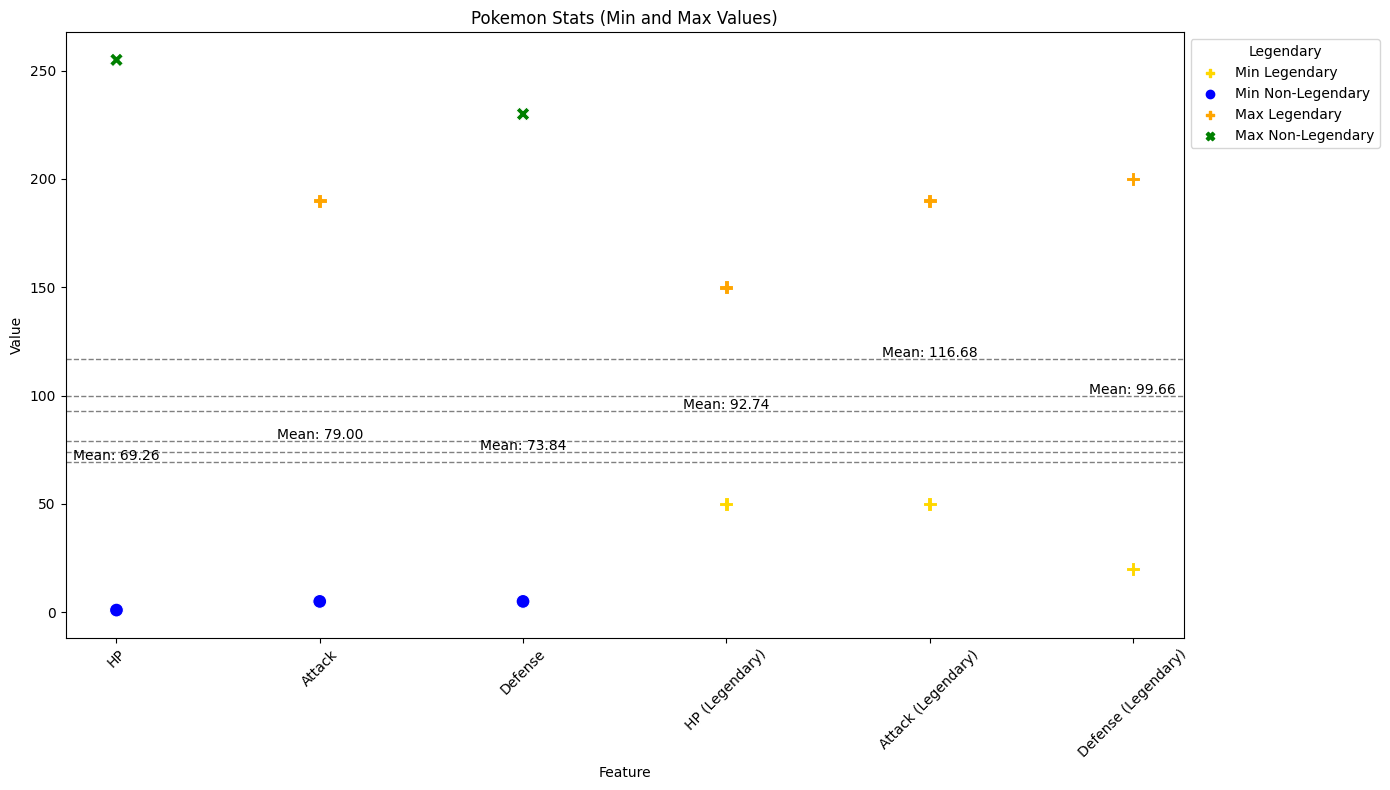

In [7]:
# Görselleştirme için veriyi hazırlama
plot_data = stats_df[stats_df['Type'] != 'Mean']

# Min ve Max verilerini işaretlemek için ayrı ayrı plot yapalım
plt.figure(figsize=(14, 8))

# Min değerleri göster
sns.scatterplot(x='Feature', y='Value', data=plot_data[plot_data['Type'] == 'Min'], s=100,
                hue='Legendary', palette={'Legendary': 'gold', 'Non-Legendary': 'blue'}, 
                style='Legendary', markers={'Legendary': 'P', 'Non-Legendary': 'o'}, legend=False)

# Max değerleri göster
sns.scatterplot(x='Feature', y='Value', data=plot_data[plot_data['Type'] == 'Max'], s=100,
                hue='Legendary', palette={'Legendary': 'orange', 'Non-Legendary': 'green'}, 
                style='Legendary', markers={'Legendary': 'P', 'Non-Legendary': 'X'}, legend=False)

# Ortalama değerleri çizme
mean_data = stats_df[stats_df['Type'] == 'Mean']
for idx, row in mean_data.iterrows():
    plt.axhline(y=row['Value'], color='gray', linestyle='--', linewidth=1)
    plt.text(x=row['Feature'], y=row['Value'] + 1, s=f"Mean: {row['Value']:.2f}", color='black', ha='center')

# Legend kısmını manuel olarak ekleme
legend_labels = {
    'Gold P': 'Min Legendary',
    'Blue o': 'Min Non-Legendary',
    'Orange P': 'Max Legendary',
    'Green X': 'Max Non-Legendary'
}
for marker, label in legend_labels.items():
    plt.scatter([], [], c=marker.split()[0].lower(), marker=marker.split()[1], label=label)

plt.title('Pokemon Stats (Min and Max Values)')
plt.ylabel('Value')
plt.xlabel('Feature')
plt.xticks(rotation=45)

# Legend'ı grafiğin dışına yerleştirme
plt.legend(title='Legendary', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

C:\Users\emirh\AppData\Local\Temp\ipykernel_4960\2639929615.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  strongest_per_type = data.groupby('Type 1').apply(lambda x: x.loc[x['Total'].idxmax()])


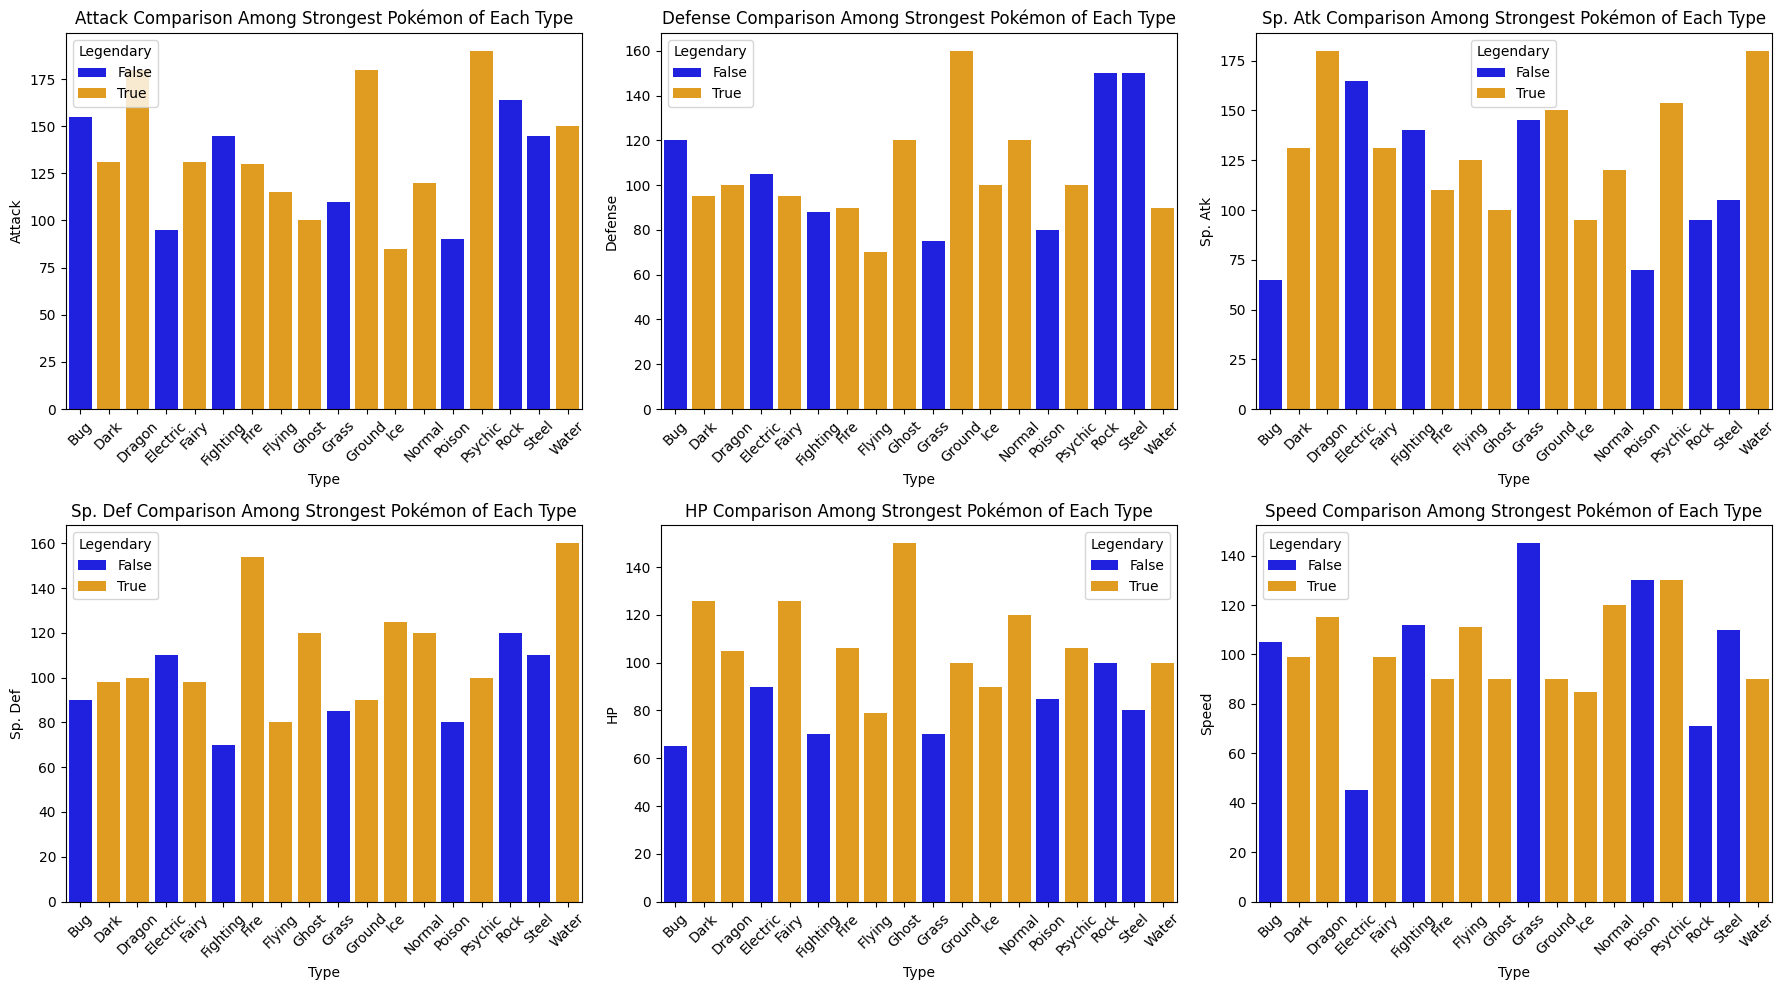

In [8]:
# Her türün en güçlü Pokémon'unu bulmak için veri setini gruplandıralım
strongest_per_type = data.groupby('Type 1').apply(lambda x: x.loc[x['Total'].idxmax()])

# Türleri ve güçlü Pokémon'ları gözlemlemek için görselleştirmeler yapalım
features_to_compare = ['Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'HP', 'Speed']

plt.figure(figsize=(18, 10))

for i, feature in enumerate(features_to_compare):
    plt.subplot(2, 3, i+1)
    sns.barplot(x=strongest_per_type['Type 1'], y=strongest_per_type[feature], 
                hue=strongest_per_type['Legendary'], dodge=False,
                palette={True: 'orange', False: 'blue'})
    plt.title(f'{feature} Comparison Among Strongest Pokémon of Each Type')
    plt.xticks(rotation=45)
    plt.ylabel(f'{feature}')
    plt.xlabel('Type')

plt.tight_layout()
plt.show()

C:\Users\emirh\AppData\Local\Temp\ipykernel_4960\271153747.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_stats.index, y=type_stats['Total'], palette='viridis')


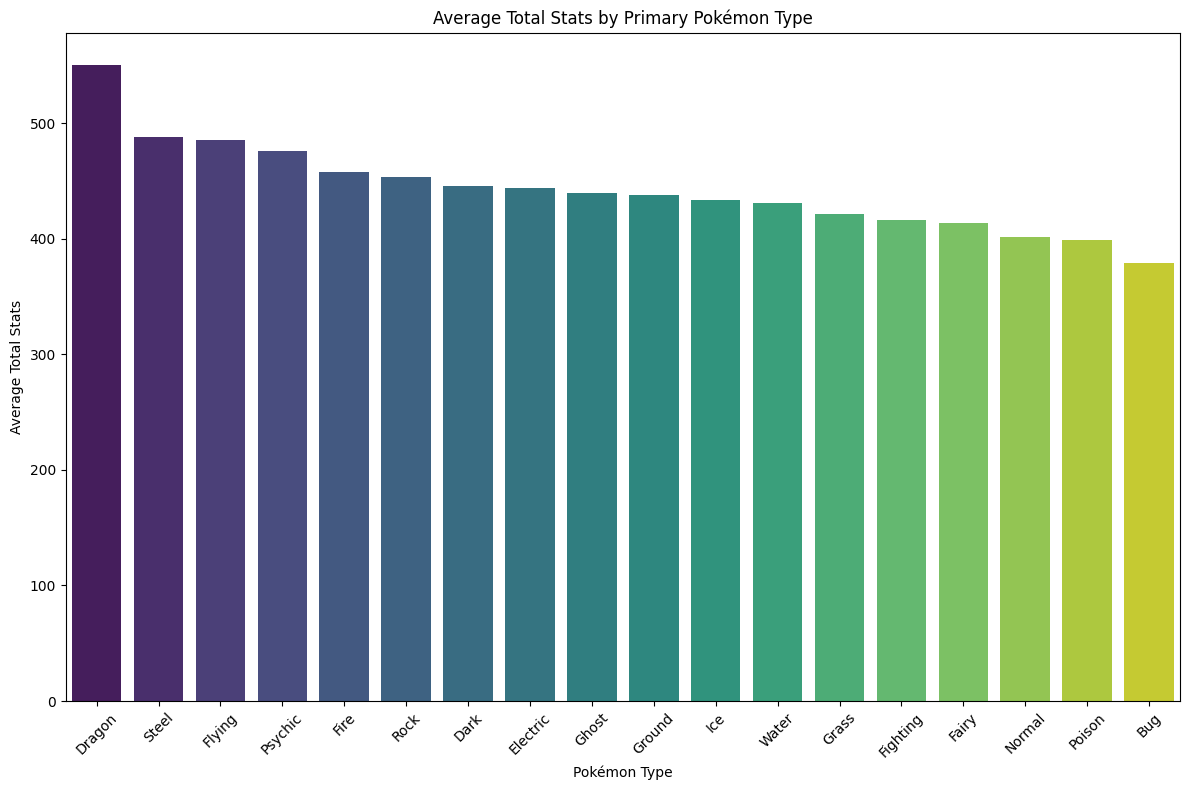

In [19]:
# Toplam istatistiklerin farklı Pokémon türleri arasında dağılımını analiz et
type_stats = data.groupby('Type 1').mean(numeric_only=True).sort_values(by='Total', ascending=False)

# Birincil türe göre ortalama toplam istatistikleri görselleştir
plt.figure(figsize=(12, 8))
sns.barplot(x=type_stats.index, y=type_stats['Total'], palette='viridis')
plt.title('Average Total Stats by Primary Pokémon Type')
plt.ylabel('Average Total Stats')
plt.xlabel('Pokémon Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\emirh\AppData\Local\Temp\ipykernel_4960\938948462.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=legendary_counts.index, y=legendary_counts, palette='pastel')


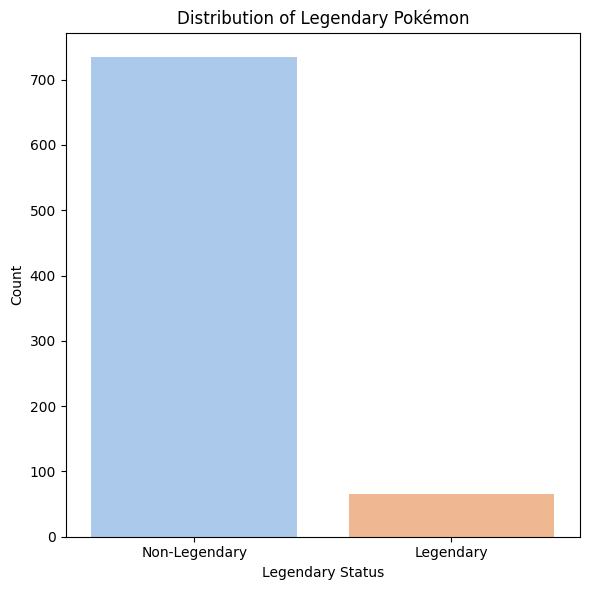

In [20]:
# Efsanevi Pokémon'ların dağılımını analiz et
legendary_counts = data['Legendary'].value_counts()

# Efsanevi ve efsanevi olmayan Pokémon'ların dağılımını görselleştir
plt.figure(figsize=(6, 6))
sns.barplot(x=legendary_counts.index, y=legendary_counts, palette='pastel')
plt.title('Distribution of Legendary Pokémon')
plt.ylabel('Count')
plt.xlabel('Legendary Status')
plt.xticks([0, 1], ['Non-Legendary', 'Legendary'])
plt.tight_layout()
plt.show()


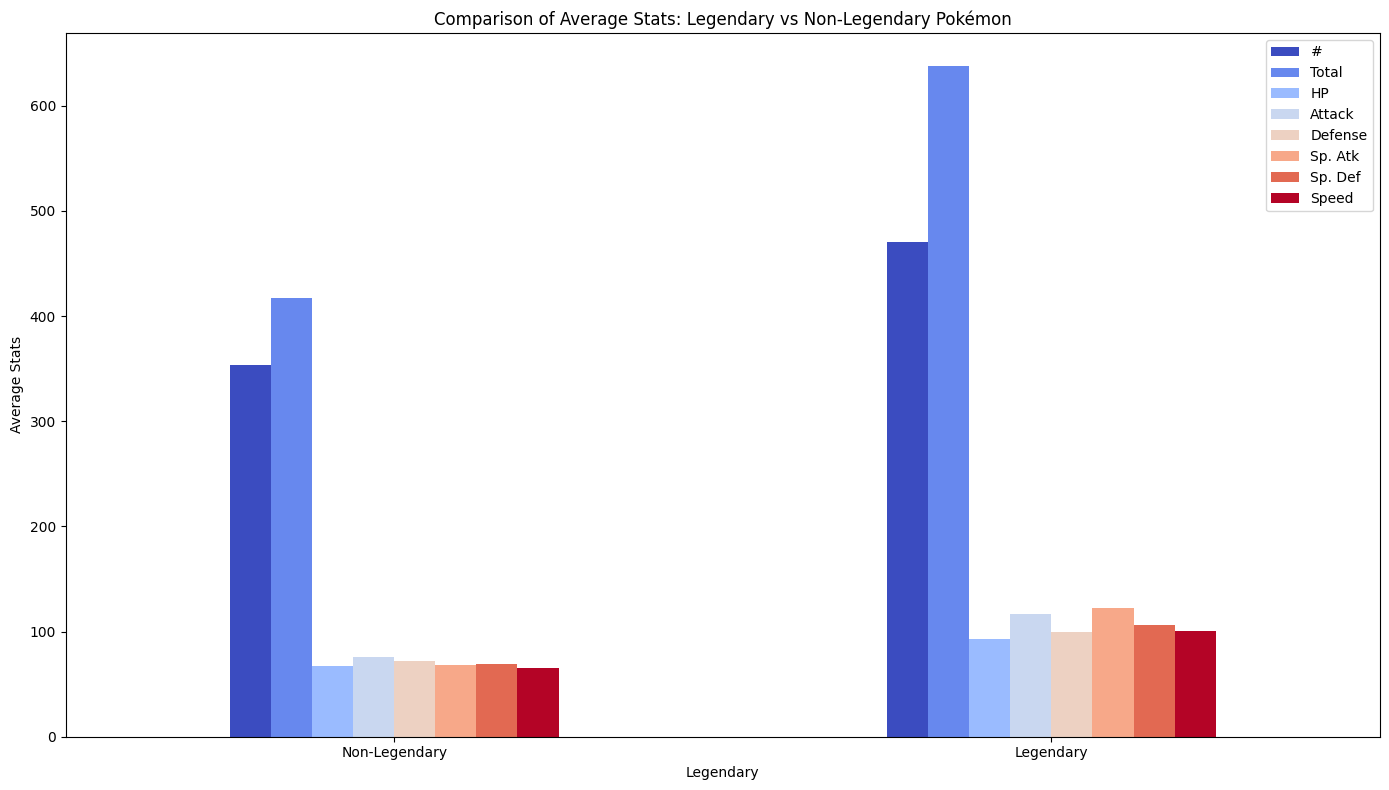

In [21]:
# Efsanevi ve efsanevi olmayan Pokémon arasındaki istatistik farkını analiz et
legendary_stats = data.groupby('Legendary').mean(numeric_only=True)

# Efsanevi ve efsanevi olmayan Pokémon arasındaki istatistik farkını görselleştir
legendary_stats.drop(columns=['Generation']).plot(kind='bar', figsize=(14, 8), colormap='coolwarm')
plt.title('Comparison of Average Stats: Legendary vs Non-Legendary Pokémon')
plt.ylabel('Average Stats')
plt.xticks([0, 1], ['Non-Legendary', 'Legendary'], rotation=0)
plt.tight_layout()
plt.show()
